In [2]:
import pandas as pd
import numpy as np
data =pd.read_excel("data.xlsx")
data['x']


0     5.0000
1     6.6500
2     8.3000
3     9.9167
4    11.5000
Name: x, dtype: float64

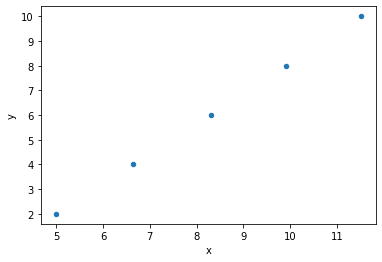

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
data.plot.scatter(x='x', y='y')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
features = data['x'].values.reshape(-1, 1)
target = data['y']

model = LinearRegression()
model.fit(features, target)

LinearRegression()

In [5]:
model.intercept_

-4.171306571609994

In [6]:
model.coef_

array([1.22940754])

In [6]:
model.intercept_
model.get_params()
model.score(features, target)

0.9883801539342456

In [7]:
model.predict(np.array([[1],[24]]))

array([  5.09083263, 149.70647603])

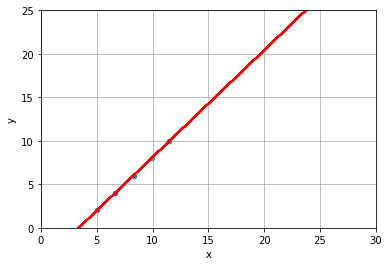

In [9]:
x = np.random.randint(0,30,1000)
data.plot.scatter(x='x', y='y')
y_line = model.coef_ * x +model.intercept_
plt.plot(x, y_line, color='r')
plt.axis([0,30,0,25])
plt.grid()
plt.savefig('test.png')
plt.show()


In [9]:
import pyecharts.options as opts
from pyecharts.charts import Line, Scatter

x_data = range(1,25)
y_data = model.coef_ * x_data +model.intercept_
line = Line()
(
    line
    .set_global_opts(
        tooltip_opts=opts.TooltipOpts(is_show=False),
        xaxis_opts=opts.AxisOpts(type_="category"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
    )
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol="emptyCircle",
        is_symbol_show=False,
        label_opts=opts.LabelOpts(is_show=False),
    )
)



x_data = data['x'].tolist()
y_data = data['y'].tolist()
scatter = (
    Scatter(init_opts=opts.InitOpts(width="800px", height="800px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="",
        y_axis=y_data,
        symbol_size=20,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_series_opts()
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="value", splitline_opts=opts.SplitLineOpts(is_show=True)
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        tooltip_opts=opts.TooltipOpts(is_show=False),
    )
    .overlap(line)
    
    .render("basic_scatter_chart.html")
)
os.system("basic_scatter_chart.html")

C:\Users\ChaiPC\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\ChaiPC\Anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


0

In [12]:

from decimal import Decimal
def to_decimal(num, exp="0.00") -> Decimal:
    if not num:
        return Decimal("0").quantize(exp=Decimal(exp))
    if not isinstance(num, str):
        num = str(num)
    return Decimal(num).quantize(exp=Decimal(exp))

dcm = '0.000'
str(to_decimal(1.106,dcm))

'1.106'

In [20]:

from decimal import Decimal
from sklearn.linear_model import LinearRegression
def reg(features, target, dcm):
    model = LinearRegression()
    features = pd.DataFrame(features).values.reshape(-1, 1)
    target = pd.DataFrame(target)
    model.fit(features, target)
    intercept = float(model.intercept_)
    coef = float(model.coef_[0])
    print(to_decimal(intercept, dcm), to_decimal(coef, dcm))
    return intercept, coef


def to_decimal(num, exp="0.00") -> Decimal:
    if not num:
        return Decimal("0").quantize(exp=Decimal(exp))
    if not isinstance(num, str):
        num = str(num)
    return Decimal(num).quantize(exp=Decimal(exp))


features = data['x'].values.reshape(-1, 1)
target = data['y']
dcm = '0.00'
print(reg(features, target, dcm))


-4.17 1.23
(-4.171306571609994, 1.2294075393504913)


In [12]:
html_para = [1,2,3,4,5,6,7,8,9,10,11,12,13]
html = """
        <!DOCTYPE html>
        <html lang="zh-CN">
        <head>
            <meta charset="utf-8">
            <title>校准结果</title>
        </head>
        <style>
            .container{
                width: 700px;
                /* height: 1123px; */
                height: 1000px;
                margin-left: auto;
                margin-right: auto;
                border: 1px black solid;
                overflow: hidden;
            }
            .title{
                width: 600px;
                overflow: hidden;
                padding: 0;
                word-break:break-all;
                margin-left: auto;
                margin-right: auto;
                padding-top: 50px;
            }
            .title>h1{
                text-align: center;
                line-height: 20px;
                padding-left: 20px;
                padding-right: 20px;
            }

            p{
                line-height: 15px;
                padding-left: 20px;
                padding-right: 20px;
            }
            .tab{
                width: 600px;
                padding: 0;
                word-break:break-all;
                margin-left: auto;
                margin-right: auto;
            }
            table{
                border-collapse: collapse;
                text-align: center;
                padding: 2px;
            }
            .figure{
                width: 500px;
                height: 500px;
                padding-left: 50px;
                padding-right: 50px;
                
            }
            .head{
                width: 120px;
                height: 40px;
            }
            .para{
                width: 60px;
                height: 40px;
            }
            footer{
                text-align: center;
            }
        </style>
        <body>
            <div class="container">
                <div class="title">
                    <h1>校准结果</h1>
                    <h1>RESULTS OF CALIBRATIONS</h1>
                    <p><strong>证书编号：%s</strong></h2>
                    <p>Certificate  No:%s</h2>
                    <p>1、起动风速：%s m/s</p>
                    <p>2、非线性误差的绝对值列表</p>
                        
                </div>
                <div class="tab">
                    <table border="1">
                        <tr>
                            <td class="head">项目检测点</td>
                            <td class="para">1</td>
                            <td class="para">2</td>
                            <td class="para">3</td>
                            <td class="para">4</td>
                            <td class="para">5</td>
                            <td class="para">6</td>
                            <td class="para">7</td>
                            <td class="para">8</td>
                        </tr>
                        <tr>
                            <td class="head">非线性误差绝对值(m/s)</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                            <td class="para">%s</td>
                        </tr>
                    </table>
                    <p>3.校准结果</p>
                    <img class="figure" src="plt.png">
                    <p>校准曲线公式：%s</p>
                </div>
                <footer>
                    <p>%s</p>
                </footer>
            </div>

        </body>
        </html>
"""%tuple((html_para))
html

'\n        <!DOCTYPE html>\n        <html lang="zh-CN">\n        <head>\n            <meta charset="utf-8">\n            <title>校准结果</title>\n        </head>\n        <style>\n            .container{\n                width: 700px;\n                /* height: 1123px; */\n                height: 1000px;\n                margin-left: auto;\n                margin-right: auto;\n                border: 1px black solid;\n                overflow: hidden;\n            }\n            .title{\n                width: 600px;\n                overflow: hidden;\n                padding: 0;\n                word-break:break-all;\n                margin-left: auto;\n                margin-right: auto;\n                padding-top: 50px;\n            }\n            .title>h1{\n                text-align: center;\n                line-height: 20px;\n                padding-left: 20px;\n                padding-right: 20px;\n            }\n\n            p{\n                line-height: 15px;\n           